# Exploratory Data Analysis

### Check if Data loads properly

In [71]:
import pandas as pd
import numpy as np

In [2]:
scripts = pd.read_csv('data/processed_scripts.csv')
meta = pd.read_csv('data/metadata.csv')

In [3]:
scripts.head()

,Season,Episode,Title,Speaker,Dialog,S-E
0,4,10,The Girl From Poughkeepsie,Ross,hey,04-10
1,4,10,The Girl From Poughkeepsie,Ross,im sorry im late did i miss anything,04-10
2,4,10,The Girl From Poughkeepsie,Phoebe,joey stuffing 15 oreos in his mouth,04-10
3,4,10,The Girl From Poughkeepsie,Ross,15 your personal best,04-10
4,4,10,The Girl From Poughkeepsie,Phoebe,where were you,04-10


In [4]:
meta.head()

,S-E,Viewers,Stars
0,01-01,21.5,8.3
1,01-02,20.2,8.1
2,01-03,19.5,8.2
3,01-04,19.7,8.1
4,01-05,18.6,8.5


## 1. Visualise metadata

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Overall Visualisation

Highest Viewed Episode  :  52.90 Million
Lowest  Viewed Episode  :  15.65 Million
Average Episode Views   :  25.03 Million
Standard Deviation      :   4.57 Million


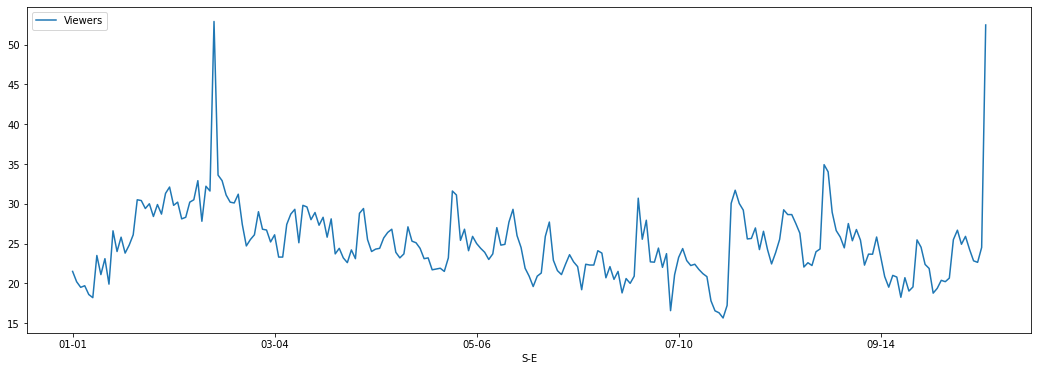

In [26]:
print(f"Highest Viewed Episode  : {max(meta.Viewers): .2f} Million")
print(f"Lowest  Viewed Episode  : {min(meta.Viewers): .2f} Million")
print(f"Average Episode Views   : {meta.Viewers.mean(): .2f} Million")
print(f"Standard Deviation      :  {meta.Viewers.std(): .2f} Million")

meta.plot('S-E', 'Viewers', figsize=(18,6))
plt.show()

Highest Episode Rating :  9.70
Lowest  Episode Rating :  7.20
Average Episode Rating :  8.44
Standard Deviation     :  0.39


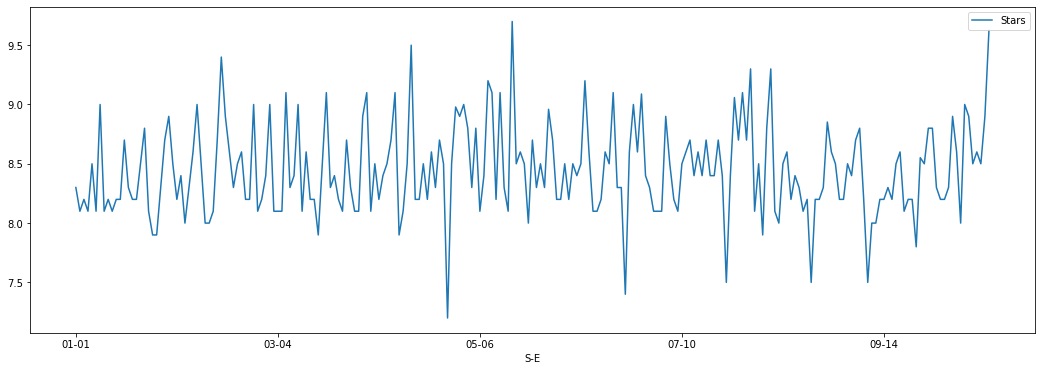

In [27]:
print(f"Highest Episode Rating : {max(meta.Stars): .2f}")
print(f"Lowest  Episode Rating : {min(meta.Stars): .2f}")
print(f"Average Episode Rating : {meta.Stars.mean(): .2f}")
print(f"Standard Deviation     : {meta.Stars.std(): .2f}")

meta.plot('S-E', 'Stars', figsize=(18,6))
plt.show()

Correlation Coefficient between viewership and rating: 0.3234580756800011


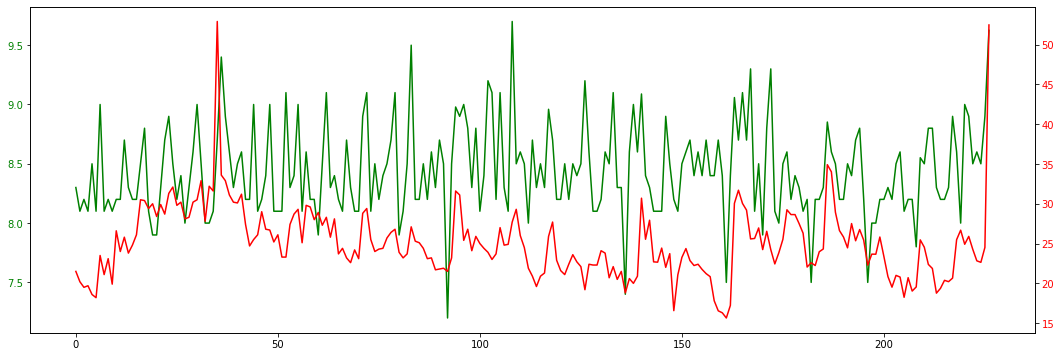

In [33]:
print(f"Correlation Coefficient between viewership and rating: {meta['Stars'].corr(meta['Viewers'])}")

fig, ax = plt.subplots(figsize=(18,6))

ax.plot(meta.Stars, color='green')
ax.tick_params(axis='y', labelcolor='green')

ax2 = ax.twinx()

ax2.plot(meta.Viewers, color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()

### 1.2 Season - Wise

In [34]:
# Extracting episode and season information for ease
meta['Season'] = meta['S-E'].str[:2].astype(int)
meta['Episode'] = meta['S-E'].str[3:].astype(int)
meta.head()

,S-E,Viewers,Stars,Season,Episode
0,01-01,21.5,8.3,1,1
1,01-02,20.2,8.1,1,2
2,01-03,19.5,8.2,1,3
3,01-04,19.7,8.1,1,4
4,01-05,18.6,8.5,1,5


In [35]:
seasons = meta.Season.unique()

#### 1.2.1 Intra-Season Variations

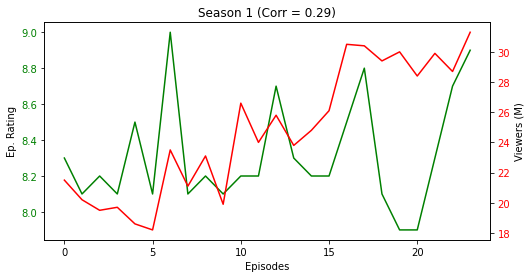

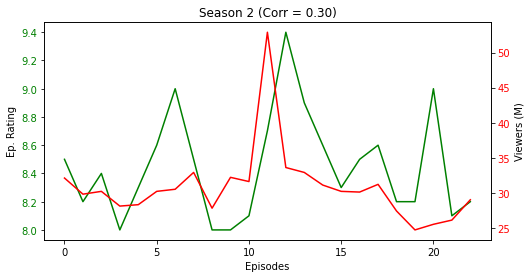

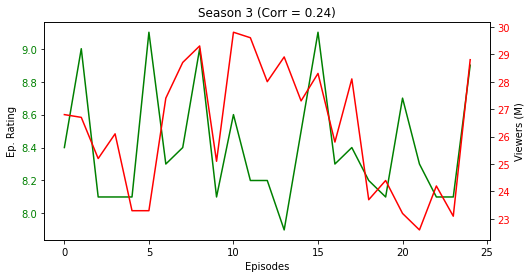

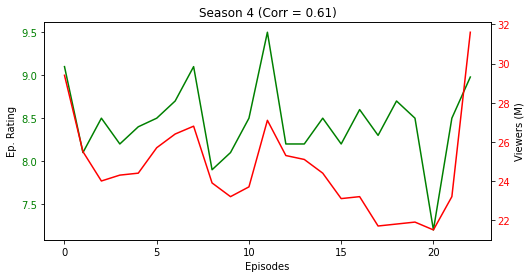

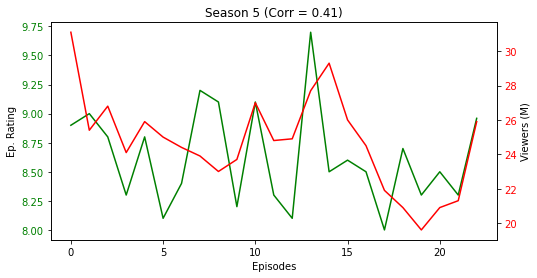

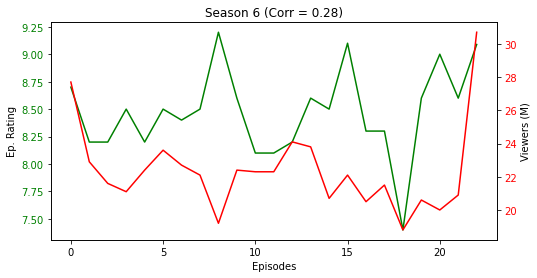

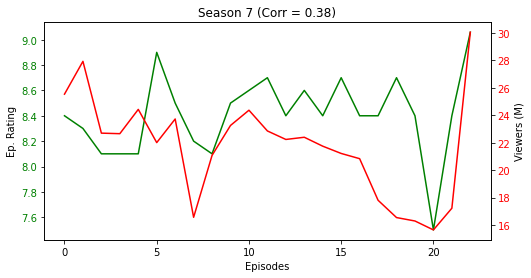

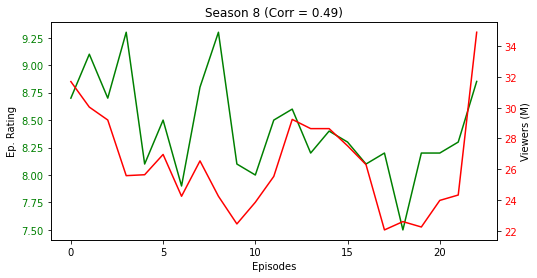

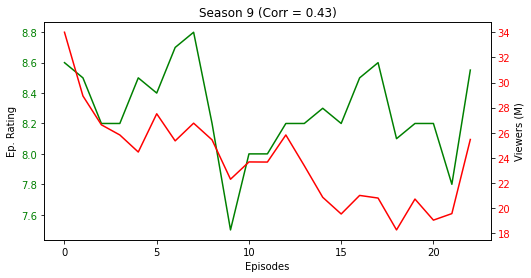

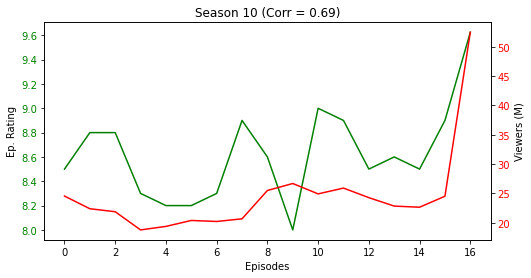

In [77]:
for season in seasons:
    viewers = meta[meta.Season == season].Viewers.values
    stars = meta[meta.Season == season].Stars.values
    # episodes = meta[meta.Season == season].Episode.values
    
    fig, ax = plt.subplots(figsize=(8,4))

    ax.plot(stars, color='green')
    ax.tick_params(axis='y', labelcolor='green')
    ax.set_title(f"Season {season} (Corr ={np.corrcoef(viewers, stars)[0][1]: .2f})")
    ax.set_xlabel("Episodes")
    ax.set_ylabel("Ep. Rating")

    ax2 = ax.twinx()

    ax2.plot(viewers, color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylabel("Viewers (M)")

    plt.show()
    

#### 1.2.2 Inter-Season Variation

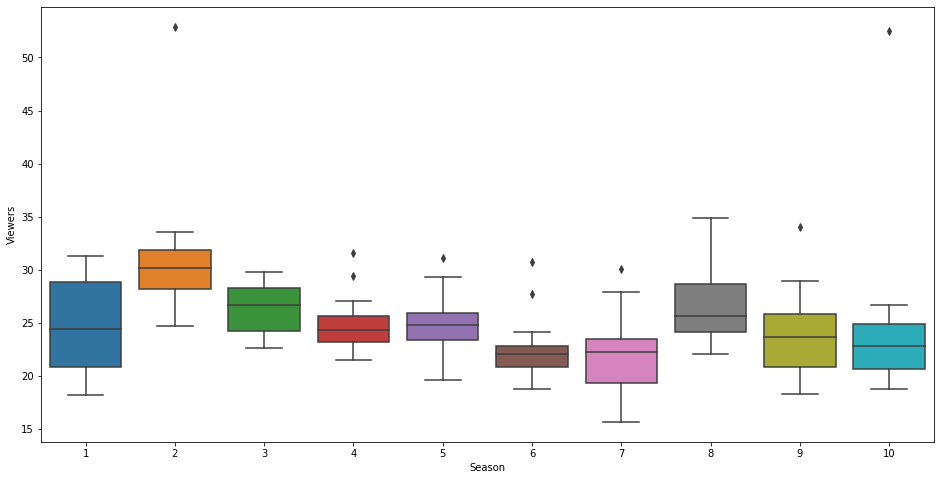

In [89]:
# Viewership boxplot
plt.figure(figsize=(16,8))

sns.boxplot(
    y = meta['Viewers'],
    x = meta['Season']
)
plt.show()

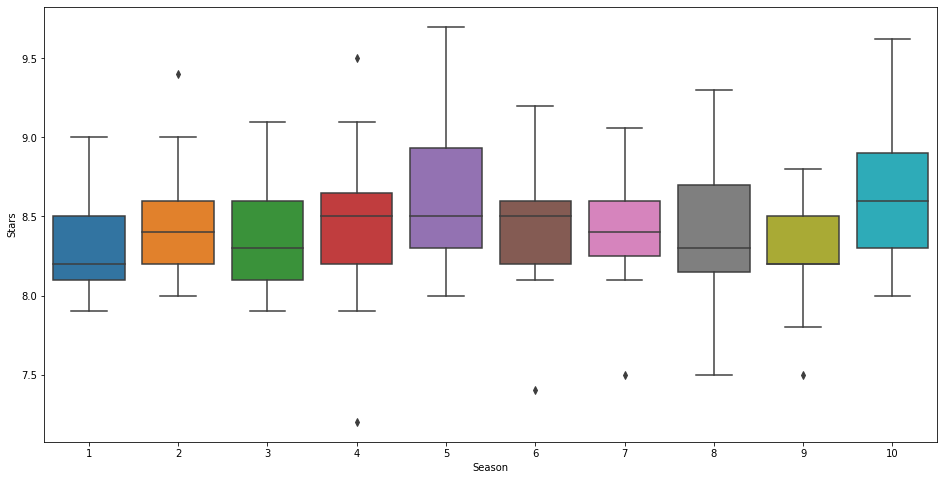

In [90]:
# Rating boxplot
plt.figure(figsize=(16,8))

sns.boxplot(
    y = meta['Stars'],
    x = meta['Season']
)
plt.show()

## 2. Visualise Script

In [93]:
scripts.columns

Index(['Season', 'Episode', 'Title', 'Speaker', 'Dialog', 'S-E'], dtype='object')